# Project Overview

## PROJECT GOAL:

* **Use President Trump's tweets (NLP and other features) to predict fluctuations in the stock market (using S&P 500 as index).**

    
### Data to Use:

* All Donald Trump tweets from inaugaration day 2017 to today (for now) - 06/20/19

    *          Extracted from http://www.trumptwitterarchive.com/
*     Minute-resolution data for the S&P500 covering the same time period.

    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    
## MAJOR REFERENCES / INSPIRATION / PRIOR WORK IN FIELD:

1. **Stanford Scientific Poster Using NLP ALONE to predict if stock prices increase or decrease 5 mins after Trump tweets.**  [Poster PDF LINK](http://cs229.stanford.edu/proj2017/final-posters/5140843.pdf)
    - [Evernote Summary Notes Link](https://www.evernote.com/l/AAoL1CyhPV1GoIzSgq59GO10x6xfEeVDo5s/)

2. **TowardsDataScience Blog Plost on "Using the latest advancements in deep learning to predict stock price movements."** [Blog Post link](https://towardsdatascience.com/aifortrading-2edd6fac689d)
    - [Evernote Summary](https://www.evernote.com/l/AApvQ8Xh8b9GBLhrD0m8w4H1ih1oVM8wkEw/)


## OUTLINE FOR DATA TO PRODUCE & MODEL FOR FINAL PROJECT:

### TWITTER DATA:

* [ENGINEER FEATURES] **Extract features from Trump's tweets: perform the NLP analysis to generate the features about his tweets to use in final model**

    * [x] Tweet sentiment score
    * [ ] Tweet frequency per timebin
    * [x] upper-to-lowercase-ratio
    * [x] retweet-count
    * [x] favorite-count
    
* [PREDICTIVE MODEL] **Generate Binary Stock Market Predictions based on Trump's Tweets.**

    * [ ] Create a neural network model like the Stanford guys, where my model JUST uses the content of trump's tweets with word embeddings and a binary label (-1, 0,1) for direction of stock market change at a fixed time delta (they did 5 mins, I will do 1 hour) [ See reference #1 - stanford poster]
  



### STOCK MARKET DATA (S&P 500):

* [ENGINEER FEATURES] **Extract features about the stock data -calculate the technical indices for the S&P 500 discussed in his article.**  [ see reference #2 - blog post ]

    * [x] 7 days moving average 
    * [x]  21 days moving average
    * [x] exponential moving average
    * [x] momentum
    * [x] Bollinger bands
    * [x] MACD
    * (Maybe) FFT / time series decomp for trend lines
    
* [PREDICTIVE MODEL] **Generate stock price predictions based only historical data using....**

    * [ ] an ARIMA model[?]
    * [ ] a FB Prophet model[?] 
    * [ ] an LSTM neural network like other blog post?  [!!!] Predicting the Stock Market Using Machine Learning and Deep Learning
    
### FINAL MODEL - FEED ALL ABOVE FEATURES INTO:

- **Plan A: NEURAL NETWORK *REGRESSION* MODEL TO PREDICT *ACTUAL S&P 500 PRICE* AT 1 HOUR-1 DAY FOLLOWING TWEETS**
    - Final Model Target is based more on blog post's construction (ref#2), but takes output of model like ref#1
    
    <img src="https://raw.githubusercontent.com/jirvingphd/dsc-5-capstone-project-online-ds-ft-021119/master/figures/annotated_GAN_for_stock_market.jpeg" width=1000>
    
- **PLAN B: NEURAL NETWORK *BINARY CLASSIFICATION*  MODEL TO PREDICT THE *DIRECTION OF CHANGE FOR S&P 500 PRICE* AT 1 HOUR - 1 DAY FOLLOWING TWEETS**
    - Final Model Target is based on stanford poster's methods/goal. (ref #1)




## DATA ANALYSIS DETAILS AND Equations/Code 

### Technical Indicators - Explanation & Equations






* 7 and 21 day moving averages 
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
* MACD(Moving Average Convergence Divergence)

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
- **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

- **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


- **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $V$ = Latest Price
        - $V_x$ = Closing Price
        - $x$ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```



###  STOCK DATA INFO - S&P500

- Q: What is the format of your aggregate bid/ask data?
    - **The order of the fields in our aggregate bid/ask files is: <br>Date, Time, BidOpen, BidHigh, BidLow, BidClose, AskOpen, AskHigh, AskLow, AskClose**

    - The format is very similar to our standard one minute and higher interval files which are constructed by aggregating the execution price and volume. The difference here is that instead of using execution price we use "national best bid and offer" (NBBO) prices to get their open, high, low and close prices for any given time interval. Bids and asks in our files are from multiple markets and they represent the best prices or the highest bid and the lowest ask.

    - We record best bid/ask values whenever there is trade activity. Like with our regular tick data, current best bid/ask values are recorded for every trade.

    - A potential usage scenario may include using this data in your analysis to try to simulate the execution price for market orders and to estimate the potential slippage that may occur.

You can download sample aggregate bid/ask data for free from the free historical data section on our Buy web page.

**HELPFUL RESOURCES**
- **Dateime Guide Article:**
    - https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f
- **Getting business day MINUTE resolution**
    - Create minute index, then limit it to business times
        - https://stackoverflow.com/questions/19373759/python-pandas-business-day-range-bdate-range-doesnt-take-1min-freq
    - Try !pip install pandas_market_calendars too

# DEF FUNCTIONS

## DEF PRIOR FUNCTIONS

In [6]:
def quick_table(tuples, col_names=None, caption =None,display_df=True):
    """Accepts a bigram output tuple of tuples and makes captioned table."""
    import pandas as pd
    from IPython.display import display
    if col_names == None:
    
        df = pd.DataFrame.from_records(tuples)
        
    else:
        
        df = pd.DataFrame.from_records(tuples,columns=col_names)
        dfs = df.style.set_caption(caption)
        
        if display_df == True:
            display(dfs)
            
    return df

def compare_word_cloud(text1,label1,text2,label2):
    """Compares the wordclouds from 2 sets of texts"""
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    wordcloud1 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text1))
    wordcloud2 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text2))


    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,15))
    ax[0].imshow(wordcloud1, interpolation='bilinear')
    ax[0].set_aspect(1.5)
    ax[0].axis("off")
    ax[0].set_title(label1, fontsize=20)

    ax[1].imshow(wordcloud2, interpolation='bilinear')
    ax[1].set_aspect(1.5)
    ax[1].axis("off")
    ax[1].set_title(label2, fontsize=20)

    fig.tight_layout()
    return fig,ax

# Define get_tags_ats to accept a list of text entries and return all found tags and ats as 2 series/lists
def get_tags_ats(text_to_search,exp_tag = r'(#\w*)',exp_at = r'(@\w*)', output='series',show_counts=False):
    """Accepts a list of text entries to search, and a regex for tags, and a regex for @'s.
    Joins all entries in the list of text and then re.findsall() for both expressions.
    Returns a series of found_tags and a series of found_ats.'"""
    import re
    import pandas as pd
    # Create a single long joined-list of strings
    text_to_search_combined = ' '.join(text_to_search)
        
    # print(len(text_to_search_combined), len(text_to_search_list))
    found_tags = re.findall(exp_tag, text_to_search_combined)
    found_ats = re.findall(exp_at, text_to_search_combined)
    
    if output.lower() == 'series':
        found_tags = pd.Series(found_tags, name='tags')
        found_ats = pd.Series(found_ats, name='ats')
        
        if show_counts==True:
            print(f'\t{found_tags.name}:\n{found_tags.value_counts()} \n\n\t{found_ats.name}:\n{found_ats.value_counts()}')
                
    if (output.lower() != 'series') & (show_counts==True):
        raise Exception('output must be set to "series" in order to show_counts')
                       
    return found_tags, found_ats


def clean_text(series,is_tokens=False,return_tokens=False, urls=True, hashtags=True, mentions=True, remove_stopwords=True, verbose=False):
    """Accepts a series/df['column'] and tokenizes, removes urls, hasthtags, and @s using regex before tokenizing and removing stopwrods"""
    import pandas as pd
    import re, nltk
    from nltk.corpus import stopwords
    
    series_cleaned=series.copy()
    
    # Remove URLS
    if urls==True:
        urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
        series_cleaned = series_cleaned.apply(lambda x: urls.sub(' ', x))
            
        if verbose==True:
            print('URLs removed...')
            
    # Remove hashtags
    if hashtags==True:
        hashtags = re.compile(r'(\#\w*)')
        series_cleaned = series_cleaned.apply(lambda x: hashtags.sub(' ', x))
        
        if verbose==True:
            print('Hashtags removed...')
    
    # Remove mentions
    if mentions==True:
        mentions = re.compile(r'(\@\w*)')
        series_cleaned = series_cleaned.apply(lambda x: mentions.sub(' ',x))

        if verbose==True:
            print('Mentions removed...')
    
    
    # Regexp_tokenize stopped words (to keep contractions)
    if is_tokens==False:
        pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
        series_cleaned = series_cleaned.apply(lambda x: nltk.regexp_tokenize(x,pattern))
        if verbose==True:
            print('Text regexp_tokenized...\n')
    
    
    # Filter Out Stopwords
    stopwords_list = []
    from nltk.corpus import stopwords
    import string
    
    # Generate Stopwords List
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['http','https','...','``','co','“','’','‘','”',
                       'rt',"n't","''","RT",'u','s',"'s",'?']#,'@','#']
    stopwords_list += [0,1,2,3,4,5,6,7,8,9]
    stopwords_list +=['RT','rt',';']
     
    if remove_stopwords==True:
        series_cleaned = series_cleaned.apply(lambda x: [w.lower() for w in x if w.lower() not in stopwords_list])
        # for s in range(len(series_cleaned)):
        #     text =[]
        #     text_stopped = []
        #     text = series_cleaned[s]
        #     text_stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
        #     series_cleaned[s]= text_stopped
        
        if verbose==True:
            print('Stopwords removed...')
       
    if return_tokens==False:
        series_cleaned = series_cleaned.apply(lambda x: ' '.join(x))
    
    print('\n')
    return series_cleaned

def train_test_val_split(X,y,test_size=0.20,val_size=0.1):
    """Performs 2 successive train_test_splits to produce a training, testing, and validation dataset"""
    from sklearn.model_selection import train_test_split

    first_split_size = test_size + val_size
    second_split_size = val_size/(test_size + val_size)

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=first_split_size)

    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=second_split_size)

    return X_train, X_test, X_val, y_train, y_test, y_val


def plot_keras_history(history):
    """Plots the history['acc','val','val_acc','val_loss']"""
    import matplotlib.pyplot as plt
    acc = history.history['acc']
    loss = history.history['loss']
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']
    x = range(1,len(acc)+1)
    
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
    ax[0].plot(x, acc,'b',label='Training Acc')
    ax[0].plot(x, val_acc,'r',label='Validation Acc')
    ax[0].legend()
    ax[1].plot(x, loss,'b',label='Training Loss')
    ax[1].plot(x, val_loss, 'r', label='Validation Loss')
    ax[1].legend()
    plt.show()
    return fig, ax


def plot_auc_roc_curve(y_test, y_test_pred):
    """ Takes y_test and y_test_pred from a ML model and plots the AUC-ROC curve."""
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, _  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



def display_random_tweets(df_tokenize,n=5 ,display_cols=['content','text_for_vectors','tokens'], group_labels=[],verbose=True):
    """Takes df_tokenize['text_for_vectors']"""
    import numpy as np
    import pandas as pd 
    from IPython.display import display
    if len(group_labels)==0:

        group_labels = display_cols

    
    random_tweets={}
    # Randomly pick n indices to display from specified col
    idx = np.random.choice(range(len(df_tokenize)), n)
    
    for i in range(len(display_cols)):
        
        group_name = str(group_labels[i])
        random_tweets[group_name] ={}

        # Select column data
        df_col = df_tokenize[display_cols[i]]
        

        tweet_group = {}
        tweet_group['index'] = idx
        
        chosen_tweets = df_col[idx]
        tweet_group['text'] = chosen_tweets

        # print(chosen_tweets)
        if verbose>0:
            with pd.option_context('max_colwidth',300):
                df_display = pd.DataFrame.from_dict(tweet_group)
                display(df_display.style.set_caption(f'Group: {group_name}'))


        random_tweets[group_name] = tweet_group
        
        # if verbose>0:
              
        #     for group,data in random_tweets.items():
        #         print(f'\n\nRandom Tweet for {group:>.{300}}:\n{"---"*20}')

        #         df = random_tweets[group]
        #         display(df)
    if verbose==0:
        return random_tweets
    else:
        return


def reload(mod):
    """Reloads the module from file."""
    from importlib import reload
    import sys
    print(f'Reloading...')
    return  reload(mod)


def process_df_full(df_full, raw_col='content_raw', fill_content_col='content',force=False):
    """Accepts df_full, which contains the raw tweets to process, the raw_col name, the column to fill.
    If force=False, returns error if the fill_content_col already exists.
    Processing Workflow:1) Create has_RT, starts_RT columns. 2) Creates [fill_content_col,`content_min_clean`] cols after removing 'RT @mention:' and urls.
    3) Removes hashtags from fill_content_col and saves hashtags in new col. 4) Removes mentions from fill_content_col and saves to new column."""
    import re
    import pandas as pd
    
    if force==False:
        if fill_content_col in df_full.columns:
            raise Exception(f'{fill_content_col} already exists. To overwrite, set force=True.')


    # # create 'content_raw' column from 'content'
    # df_full[fill_content_col] = df_full['content'].copy()


    # Add has_RT and starts_RT columns
    # Creating columns for tweets that `has_RT` or `starts_RT`
    df_full['has_RT']=df_full[raw_col].str.contains('RT')
    df_full['starts_RT']=df_full[raw_col].str.contains('^RT')


    ## FIRST REMOVE THE RT HEADERS

    # Remove `RT @Mentions` FIRST:
    re_RT = re.compile(r'RT [@]?\w*:')

    # raw_col =  'content_raw'
    check_content_col =raw_col
    fill_content_col = fill_content_col

    df_full['content_starts_RT'] = df_full[check_content_col].apply(lambda x: re_RT.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: re_RT.sub(' ',x))


    ## SECOND REMOVE URLS
    # Remove urls with regex
    urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

    check_content_col = fill_content_col
    fill_content_col = fill_content_col

    # df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: urls.sub(' ',x))

    ## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
    df_full['content_min_clean'] =  df_full[fill_content_col]




    ## REMOVE AND SAVE HASHTAGS, MENTIONS
    # Remove and save Hashtags
    hashtags = re.compile(r'\#\w*')

    check_content_col = fill_content_col
    fill_content_col = fill_content_col

    df_full['content_hashtags'] =  df_full[check_content_col].apply(lambda x: hashtags.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: hashtags.sub(' ',x))


    # Remove and save mentions (@)'s
    mentions = re.compile(r'\@\w*')

    check_content_col = fill_content_col
    fill_content_col = fill_content_col

    df_full['content_mentions'] =  df_full[check_content_col].apply(lambda x: mentions.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: mentions.sub(' ',x))

    return df_full



def load_orig_dataset(root_dir = 'russian-troll-tweets/', ext='.csv'):
    """Accepts a root_dir, finds all files that end with ext and loads into a dataframe."""
    import os
    import pandas as pd
    # root_dir = 'russian-troll-tweets/'
    # os.listdir('russian-troll-tweets/')
    filelist = [os.path.join(root_dir,file) for file in os.listdir(root_dir) if file.endswith(ext)]
    print(f'Loading {len(filelist)} files into dataframe...')
        # Vertically concatenate 
    df = pd.DataFrame()
    for file in filelist:
        df_new = pd.read_csv(file)
        df = pd.concat([df,df_new], axis=0)
    # df.info()

    return df

def ask_user_to_save(df, filename=None,encoding=None, ask=True, skip_saving=False, overwrite=False):
    """Asks user to save df as filename. If no filename specified: filename ='saved_df.csv'
    Set ask=False to save without asking."""
    import os, warnings

    if type(df)=='string':
        raise Exception('First input must be the dataframe to be saved.')
    if skip_saving==True:
        return print(f'Since skip_loading=True, no file was save.')

    if filename==None:
        filename='saved_df.csv'
    
    if ask==True:
        ans = input('Would you like to save the df to a .csv?(y/n):')
    else:
        ans = 'y'
    
    # If ans to save =='y'
    if ans.lower()=='y':

        # Check if the file already exists
        if filename in os.listdir():
        
            if overwrite==False:
                # raise Exception(f"{filename} already exists.")
                return warnings.warn(f"{filename} already exists.")

            if overwrite==True:
                warnings.warn(f"Overwriting {filename}.")

        df.to_csv(filename)
        print(f'{filename} successfully saved.')
    else:
        print('Ok. No file was saved. ')
        

def ask_user_to_load(filename, load_as_global = True ,ask=True, skip_loading=False, index_col=0, encoding=None):
    """Asks user to save df as filename. If no filename specified: filename ='saved_df.csv'
    Set ask=False to save without asking."""
    import os
    import pandas as pd

    
    if skip_loading==True:
        return print(f'Since skip_loading=True, no file was loaded.')
        

    if ask==True:
        ans = input('Would you like to load {filename} to a datafrane?(y/n):')

    else:
        ans = 'y'
        

    # If ans to load =='y'
    if ans.lower()=='y':
        
        if load_as_global == True:
            global df_
            df_ = pd.read_csv(filename, encoding=encoding,index_col=index_col) 
            print(f'{filename} loaded as global variable: "df_"')
            pass
        else:
            df_ = pd.read_csv(filename, encoding=encoding,index_col=index_col) 
            return df_
    else:
        return print('Ok. No file was loaded.')
        

def run_all_checkpoint(skip=False):
    ans = input('Continue running all?(y/n):')
    if ans.lower()=='y':
        return print('OK. Continuing to run...')
    else:
        raise Exception('User requested to stop running.')


## TO CHECK FOR STRINGS IN BOTH DATASETS:
def check_dfs_for_exp_list(df_controls, df_trolls, list_of_exp_to_check):
    df_resample = df_trolls
    for exp in list_of_exp_to_check:
    #     exp = '[Pp]eggy'
        print(f'For {exp}:')
        print(f"\tControl tweets: {len(df_controls.loc[df_controls['content_min_clean'].str.contains(exp)])}")
        print(f"\tTroll tweets: {len(df_resample.loc[df_resample['content_min_clean'].str.contains(exp)])}\n")
              
# list_of_exp_to_check = ['[Pp]eggy','[Mm]exico','nasty','impeachment','[mM]ueller']
# check_dfs_for_exp_list(df_controls, df_resample, list_of_exp_to_check=list_of_exp_to_check)


def get_group_texts_tokens(df_small, groupby_col='troll_tweet', group_dict={0:'controls',1:'trolls'}, column='content_stopped'):
    from nltk import regexp_tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    text_dict = {}
    for k,v in group_dict.items():
        group_text_temp = df_small.groupby(groupby_col).get_group(k)[column]
        group_text_temp = ' '.join(group_text_temp)
        group_tokens = regexp_tokenize(group_text_temp, pattern)
        text_dict[v] = {}
        text_dict[v]['tokens'] = group_tokens
        text_dict[v]['text'] =  ' '.join(group_tokens)
            
    print(f"{text_dict.keys()}:['tokens']|['text']")
    return text_dict



def check_df_groups_for_exp(df_full, list_of_exp_to_check, check_col='content_min_clean', groupby_col='troll_tweet', group_dict={0:'Control',1:'Troll'}):      
    """Checks `check_col` column of input dataframe for expressions in list_of_exp_to_check and 
    counts the # present for each group, defined by the groupby_col and groupdict. 
    Returns a dataframe of counts."""
    
    list_of_results = []      

    header_list= ['Term']
    [header_list.append(x) for x in group_dict.values()]
    list_of_results.append(header_list)
    
    for exp in list_of_exp_to_check:
        curr_exp_list = [exp]
        
        for k,v in group_dict.items():
            df_group = df_full.groupby(groupby_col).get_group(k)
            curr_group_count = len(df_group.loc[df_group[check_col].str.contains(exp)])
            curr_exp_list.append(curr_group_count)
        
        list_of_results.append(curr_exp_list)
        
    df_results = bs.list2df(list_of_results, index_col='Term')
    return df_results


###########################################################################

def plot_fit_cloud(troll_cloud,contr_cloud,label1='Troll',label2='Control'):
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,18))

    ax[0].imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax[0].axis("off")
    ax[0].set_title(label1, fontsize=40)

    ax[1].imshow(contr_cloud, interpolation='bilinear',)
    # ax[1].set_aspect(1.5)
    ax[1].axis("off")
    ax[1].set_title(label2, fontsize=40)
    plt.tight_layout()
    return fig, ax

In [7]:
# !pip install pandas_market_calendars
# # Install GraphViz with apt
# !apt-get install graphviz -y

# import pandas_market_calendars as pmc

## DEF - FILE & VAR MANAGEMENT FUNCTIONS


In [8]:
##################### FILE & VAR MANAGEMENT FUNCTIONS #####################

# def mount_google_drive(force_remount=True):
#     from google.colab import drive
#     print('drive_filepath="drive/My Drive/"')
#     return drive.mount('/content/drive', force_remount=force_remount)


# def check_for_google_drive(mount_if_not=True):
#     import os
#     # Check if google drive is already mounted
#     x=[]
#     try: os.listdir('drive/My Drive/')
#     except FileNotFoundError: x=None

#     # if GDrive not mounted, mount it
#     if x==None:
#         print('Drive not mounted.')
#         if mount_if_not==False:
#             return False
#         else:
#             print('Mounting google drive...')
#             return mount_google_drive()
#     else:
#         return True

# def cd_project_folder(folder_path ='/content/drive/My Drive/Colab Notebooks/Mod 5 Project/data/'):
#     import os
#     return os.chdir(folder_path),print('Cur Dir:', os.getcwd())
#     # print('Dir Contents:\n',os.listdir())
    
    
#################### GENERAL HELPER FUNCTIONS #####################
def is_var(name):
    x=[]
    try: eval(name)
    except NameError: x = None
        
    if x is None:
        return False
    else:
        return True    

In [9]:
## SAVE AND LOAD STOCK MARKET MINUTE DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# mount_google_drive()

# cd_project_folder()
# import os 
# os.getcwd()

## DEF TIMESERIES TESTS AND VISUALS

In [10]:

############### TIMESERIES TESTS AND VISUALS ###############

def plot_time_series(stocks_df, freq=None, fill_method='ffill',figsize=(12,4)):
    
    df = stocks_df.copy()
    df.fillna(method=fill_method, inplace=True)
    df.dropna(inplace=True)
    
    if (df.index.freq==None) & (freq == None):
        xlabels=f'Time'
    
    elif (df.index.freq==None) & (freq != None):
        df = df.asfreq(freq)
        df.fillna(method=fill_method, inplace=True)
        df.dropna(inplace=True)
        xlabels=f'Time - Frequency = {freq}'

    else:
        xlabels=f'Time - Frequency = {df.index.freq}'
        
    ylabels="Price"

    raw_plot = df.plot(figsize=figsize)
    raw_plot.set_title('Stock Bid Closing Price ')
    raw_plot.set_ylabel(ylabels)
    raw_plot.set_xlabel(xlabels)
    
    


## DEF TIMEINDEX FUNCTIONS

In [11]:
#################### TIMEINDEX FUNCTIONS #####################
def get_day_window_size_from_freq(dataset):#, freq='CBH'):
    
    if dataset.index.freq == custom_BH_freq():
        return 7
    
    if dataset.index.freq=='T':
        day_window_size = 1440
    elif dataset.index.freq=='BH':
        day_window_size = 8
    elif dataset.index.freq=='CBH':
        day_window_size = 7
    elif dataset.index.freq=='B':
        day_window_size=1
    elif dataset.index.freq=='D':
        day_window_size=1
        
    else:
        raise Exception('dataset freq=None')
        
    return day_window_size
    

def custom_BH_freq():
    import pandas as pd
    CBH = pd.tseries.offsets.CustomBusinessHour(start='09:30',end='16:30')
    return CBH
    
    
def  set_timeindex_freq(ive_df, col_to_fill=None, freq='CBH',fill_method='ffill',
                        verbose=3): #set_tz=True,
    
    import pandas as pd
    import numpy as np
    
    
    if verbose>1:
        # print(f"{'Index When:':>{10}}\t{'Freq:':>{20}}\t{'Index Start:':>{40}}\t{'Index End:':>{40}}")
        print(f"{'Index When:'}\t{'Freq:'}\t{'Index Start'}\t\t{'Index End:'}")
        print(f"Pre-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")
        
    
    if freq=='CBH':
        freq=custom_BH_freq()
#         start_idx = 
        
    # Change frequency to freq
    ive_df = ive_df.asfreq(freq,)#'min')
    
    #     # Set timezone
    #     if set_tz==True:
    #         ive_df.tz_localize()
    #         ive_df.index = ive_df.index.tz_convert('America/New_York')
    
    # Report Success / Details
    if verbose>1:
        print(f"Post-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")


    ## FILL AND TRACK TIMEPOINTS WITH MISSING DATA    
    
    # Helper Function for adding column to track the datapoints that were filled
    def check_null_times(x):
        import numpy as np
        if np.isnan(x):
            return True
        else:
            return False

    ## CREATE A COLUMN TO TRACK ROWS TO BE FILLED
    # If col_to_fill provided, use that column to create/judge ive_df['filled_timebin'] 
    if col_to_fill!=None:
        ive_df['filled_timebin'] = ive_df[col_to_fill].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()
        
    # if not provided, use all columns and sum results
    elif col_to_fill == None:
        # Prefill fol with 0's
        ive_df['filled_timebin']=0
        
        # loop through all columns and add results of check_null_times from each loop
    for col in ive_df.columns:
        if ive_df[col].dtypes=='float64':
            #ive_df['filled_timebin'] = ive_df[target_col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()
            curr_filled_timebin_col = ive_df[col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any() 

            # add results
            ive_df['filled_timebin'] +=  curr_filled_timebin_col
            
    ive_df['filled_timebin'] = ive_df['filled_timebin'] >0
            
    ## FILL IN NULL VALUES
    ive_df.fillna(method=fill_method, inplace=True)

    # Report # filled
    if verbose>0:
        check_fill = ive_df.loc[ive_df['filled_timebin']>0]
        print(f'\nFilled {len(check_fill==True)}# of rows using method {fill_method}')
    
    # Report any remaning null values
    if verbose>0:
        res = ive_df.isna().sum()
        if res.any():
            print(f'Cols with Nulls:')
            print(res[res>0])
        else:
            print('No Remaining Null Values')   
            
    # display header
    if verbose>2:
        display(ive_df.head())
    
    return ive_df


# Helper Function for adding column to track the datapoints that were filled
def check_null_times(x):
    import numpy as np
    if np.isnan(x):
        return True
    else:
        return False

## DEF SEASONAL DECOMPOSITION

In [12]:
######## SEASONAL DECOMPOSITION    
def plot_decomposition(TS, decomposition, figsize=(12,8),window_used=None):
    """ Plot the original data and output decomposed components"""
    
    # Gather the trend, seasonality and noise of decomposed object
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fontdict_axlabels = {'fontsize':12}#,'fontweight':'bold'}
    
    # Plot gathered statistics
    fig, ax = plt.subplots(nrows=4, ncols=1,figsize=figsize)
    
    ylabel = 'Original'
    ax[0].plot(np.log(TS), color="blue")
    ax[0].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    
    ylabel = label='Trend'
    ax[1].plot(trend, color="blue")
    ax[1].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    
    ylabel='Seasonality'
    ax[2].plot(seasonal, color="blue")
    ax[2].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    
    ylabel='Residuals'
    ax[3].plot(residual, color="blue")
    ax[3].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    ax[3].set_xlabel('Time', fontdict=fontdict_axlabels)
    
    # Add title with window 
    if window_used == None:
        plt.suptitle('Seasonal Decomposition', y=1.02)
    else:
        plt.suptitle(f'Seasonal Decomposition - Window={window_used}', y=1.02)
    
    # Adjust aesthetics
    plt.tight_layout()
    
    return ax
    
    
def seasonal_decompose_and_plot(ive_df,col='BidClose',freq='H',
                          fill_method='ffill',window=144,
                         model='multiplicative', two_sided=False,
                               plot_components=True):##WIP:
    """Perform seasonal_decompose from statsmodels.tsa.seasonal.
    Plot Output Decomposed Components"""
    import pandas as pd
    import numpy as np
    from statsmodels.tsa.seasonal import seasonal_decompose


    # TS = ive_df['BidClose'].asfreq('BH')
    TS = pd.DataFrame(ive_df[col])
    TS = TS.asfreq(freq)
    TS[TS==0]=np.nan
    TS.fillna(method='ffill',inplace=True)

    # Perform decomposition
    decomposition = seasonal_decompose(np.log(TS),freq=window, model=model, two_sided=two_sided)
    
    if plot_components==True:
        ax = plot_decomposition(TS, decomposition, window_used=window)
    
    return decomposition



def stationarity_check(df, col='BidClose',freq=None, day_window_size='infer',
                       days_in_rolling_window=5):
    """From learn.co lesson: use ADFuller Test for Stationary and Plot"""
    
    import matplotlib.pyplot as plt
    TS = df[col].copy()
    
    if freq==None:
        freq=df.index.freq
        
    else:        
        TS = TS.asfreq(freq)
        TS.fillna(method='ffill',inplace=True)
        TS.dropna(inplace=True)
    
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    import numpy as np
    
    # Calculate rolling statistics
    if day_window_size=='infer':
        day_window_size = get_day_window_size_from_freq(TS)
        
    window = day_window_size*days_in_rolling_window
    rolmean = TS.rolling(window = window, center = False).mean()
    rolstd = TS.rolling(window = window, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,4))
    ax[0].set_title('Rolling Mean & Standard Deviation')

    ax[0].plot(TS, color='blue',label='Original')
    ax[0].plot(rolmean, color='red', label='Rolling Mean',alpha =0.6)
    ax[1].plot(rolstd, color='black', label = 'Rolling Std')
    ax[0].legend()
    ax[1].legend()
#     plt.show(block=False)
    plt.tight_layout()
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')
    print('\tIf p<.05 then timeseries IS stationary.')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

## DEF DATASET LOADING FUNCTIONS

In [15]:
##################### DATASET LOADING FUNCTIONS #####################   
def load_raw_stock_data_from_txt(filename='IVE_bidask1min.txt', 
                               folderpath='data/',
                               start_index = '2017-01-23', verbose=2):
    
#     check_for_google_drive()
    
    import pandas as pd
    
    headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
    
    fullfilename= folderpath+filename
    ive_df = pd.read_csv(fullfilename, names=headers,parse_dates=True)
    
    # Create datetime index
    date_time_index = ive_df['Date']+' '+ive_df['Time']
    
    #ive_df.index=date_time_index
    #ive_df.index = pd.to_datetime(ive_df.index)
    date_time_index = pd.to_datetime(date_time_index)
    ive_df.index=date_time_index
    
    ive_df = ive_df[start_index:]
    
    if verbose>0:
        display(ive_df.head())
    if verbose>1:
        print(ive_df.index)
        
    return ive_df



def load_stock_df_from_csv(filename='ive_sp500_min_data_match_twitter_ts.csv',
                           folderpath='data/',
                          start_index = '2017-01-23', clean=False,freq='CBH',
                           fill_method='ffill',verbose=2):
    import os
    import pandas as pd

    #         check_for_google_drive()
        
    # Check if user provided folderpath to append to filename
    if len(folderpath)>0:
        fullfilename = folderpath+filename
    else:
        fullfilename=filename
        
    # load in csv by fullfilename
    stock_df = pd.read_csv(fullfilename,index_col=0, parse_dates=True)
    stock_df = stock_df[start_index:]
#     stock_df = set_timeindex_freq(stock_df,['BidClose'],freq=freq, fill_method=fill_method)
    
    if clean==True:
        
        if verbose>0:
            print(f"Number of 0 values:\n{len(stock_df.loc[stock_df['BidClose']==0])}")
            print(f"Filling 0 values using method = {fill_method}")
            
        stock_df.loc[stock_df['BidClose']==0] = np.nan
        stock_df['BidClose'].fillna(method=fill_method, inplace=True)
        
    if freq!=None:
        # Set the time index .
        stock_df = set_timeindex_freq(stock_df, freq=freq, fill_method = fill_method, verbose=verbose)
        

    # Display info depending on verbose level
    if verbose>0:
        display(stock_df.head())
    
    if verbose>1:
        print(stock_df.index)
        
    return stock_df   

## CALCULATING TECHNICAL INDICATORS

In [43]:
def get_technical_indicators(dataset,make_price_from='BidClose'):
    

    dataset['price'] = dataset[make_price_from].copy()
    if dataset.index.freq == custom_BH_freq():
        days = get_day_window_size_from_freq(dataset)#,freq='CBH')
    else:
        days = get_day_window_size_from_freq(dataset)
        
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7*days).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21*days).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['price'].ewm(span=26*days).mean()
#     dataset['12ema'] = pd.ewma(dataset['price'], span=12)
    dataset['12ema'] = dataset['price'].ewm(span=12*days).mean()

    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
#     dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
    dataset['20sd'] = dataset['price'].rolling(20*days).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-days*1
    
    return dataset


# LOAD DATASET

DatetimeIndex(['2017-01-23 09:30:00', '2017-01-23 10:30:00',
               '2017-01-23 11:30:00', '2017-01-23 12:30:00',
               '2017-01-23 13:30:00', '2017-01-23 14:30:00',
               '2017-01-23 15:30:00', '2017-01-24 09:30:00',
               '2017-01-24 10:30:00', '2017-01-24 11:30:00',
               ...
               '2019-06-20 13:30:00', '2019-06-20 14:30:00',
               '2019-06-20 15:30:00', '2019-06-21 09:30:00',
               '2019-06-21 10:30:00', '2019-06-21 11:30:00',
               '2019-06-21 12:30:00', '2019-06-21 13:30:00',
               '2019-06-21 14:30:00', '2019-06-21 15:30:00'],
              dtype='datetime64[ns]', length=4410, freq='CBH')


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,filled_timebin
2017-01-23 09:30:00,01/23/2017,09:30,96.15,96.23,96.15,96.23,96.36,96.36,96.30,96.30,False
2017-01-23 10:30:00,01/23/2017,10:30,95.98,96.00,95.98,96.00,95.99,96.01,95.99,96.01,False
2017-01-23 11:30:00,01/23/2017,11:30,95.91,95.95,95.91,95.94,95.92,95.96,95.92,95.95,False
2017-01-23 12:30:00,01/23/2017,12:30,95.84,95.84,95.84,95.84,95.85,95.85,95.85,95.85,False
2017-01-23 13:30:00,01/23/2017,13:30,95.88,95.88,95.88,95.88,95.89,95.89,95.89,95.89,False


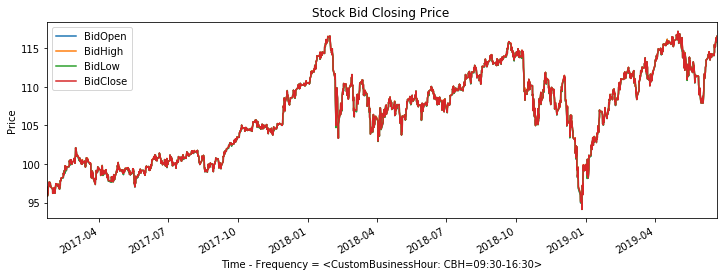

In [37]:
# LOAD IN DATASET
ive_df = load_stock_df_from_csv(freq='CBH',verbose=0)
print(ive_df.index)

# ive_df=ive_df['2019':]
display(ive_df.head())
plot_time_series(ive_df.filter(regex='Bid'))

In [44]:
# Calculate technical indicators 
stock_df = get_technical_indicators(ive_df)

# Remove timepoints without enough time periods for all indicators
na_idx = stock_df.loc[stock_df['upper_band'].isna() == True].index
stock_df = stock_df.loc[na_idx[-1]+1*na_idx.freq:]
print(stock_df.index)

# Check for null values
res = stock_df.isna().sum()
res[res>0]

DatetimeIndex(['2017-02-20 15:30:00', '2017-02-21 09:30:00',
               '2017-02-21 10:30:00', '2017-02-21 11:30:00',
               '2017-02-21 12:30:00', '2017-02-21 13:30:00',
               '2017-02-21 14:30:00', '2017-02-21 15:30:00',
               '2017-02-22 09:30:00', '2017-02-22 10:30:00',
               ...
               '2019-06-20 13:30:00', '2019-06-20 14:30:00',
               '2019-06-20 15:30:00', '2019-06-21 09:30:00',
               '2019-06-21 10:30:00', '2019-06-21 11:30:00',
               '2019-06-21 12:30:00', '2019-06-21 13:30:00',
               '2019-06-21 14:30:00', '2019-06-21 15:30:00'],
              dtype='datetime64[ns]', length=4264, freq='CBH')


Series([], dtype: int64)

## Checking for Stationarity and Trends

Results of Dickey-Fuller Test:
	If p<.05 then timeseries IS stationary.
Test Statistic                   -1.867508
p-value                           0.347497
#Lags Used                        0.000000
Number of Observations Used    4409.000000
Critical Value (1%)              -3.431834
Critical Value (5%)              -2.862196
Critical Value (10%)             -2.567119
dtype: float64


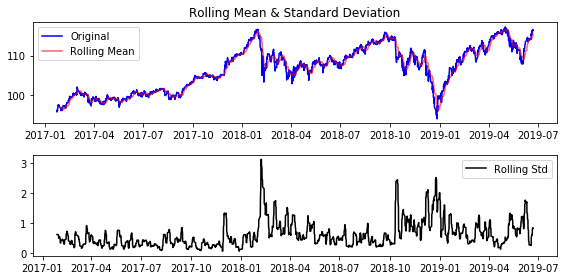

In [39]:
# Check if stationary
stationarity_check(ive_df, freq=custom_BH_freq())
# pause

In [40]:
# # Differencing 
# df_diff =ive_df['BidClose'].copy().asfreq('BH')
# df_diff = df_diff.diff(1)
# diff_plot = df_diff.plot(alpha=0.6, figsize=(12,4))
# diff_plot.set_title('Differenced Time Series')
# diff_plot.set_ylabel('Price')
# diff_plot.axhline(0,color='black',ls=':')

# BOOKMARK

In [41]:
last_days=90
dataset=stock_df
days = get_day_window_size_from_freq(dataset)
shape_0 = dataset.shape[0]
print(shape_0)
print(days)
xmacd_ = shape_0-(days*last_days)
xmacd_

4264
7


3634

No handles with labels found to put in legend.


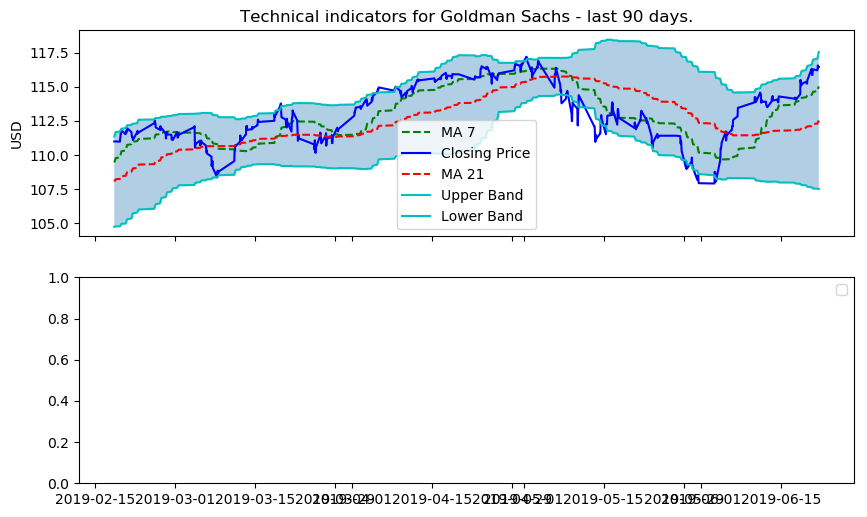

In [49]:
def plot_technical_indicators(dataset, last_days=90):
    

#     dataset.dropna(inplace=True)        
    days = get_day_window_size_from_freq(dataset)
    
    fig, ax = plt.subplots(nrows=2,sharex=True, ncols=1,figsize=(10, 6), dpi=100)
#     shape_0 = dataset.shape[0]
#     xmacd_ = shape_0-(days*last_days)
    
    dataset = dataset.iloc[-(days*last_days):, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    ax[0].plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    ax[0].plot(dataset['price'],label='Closing Price', color='b')
    ax[0].plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    ax[0].plot(dataset['upper_band'],label='Upper Band', color='c')
    ax[0].plot(dataset['lower_band'],label='Lower Band', color='c')
    ax[0].fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    ax[0].set_title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    ax[0].set_ylabel('USD')
    ax[0].legend()

#     shape_0 = dataset.shape[0]
#     xmacd_ = shape_0-(days*last_days)
#     # Plot second subplot
#     ax[1].set_title('MACD')
#     ax[1].plot(dataset['MACD'],label='MACD', linestyle='-.')
#     ax[1].hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     ax[1].hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
#     ax[1].plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    ax[1].legend()
    plt.show()
    
plot_technical_indicators(stock_df)#.filter(regex='Bid'))  


# Forecasting Stock Market Data

In [0]:
def scale_timeseries_data(data, as_series=True, return_scaler = True, verbose=2):
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    
    if verbose>0:
        print(f'Input Range: {np.min(data)} - {np.max(data)}')
        print(f'Input Shape: {np.shape(data)}')

    index = data.index
    data = scaler.fit_transform(data.values.reshape(-1,1))
    if verbose>0:
        print(f'Shape of Transformed Data = {data.shape}')

    data = data.flatten() #.reshape(-1,1)
    
    if as_series==True:
        data = pd.Series(data)
        data.index = index

    if verbose>0:
        print(f'\nOutput Range: {np.min(data)} - {np.max(data)}')
        print(f'Output Shape: {np.shape(data)}')
    
    if return_scaler==True:
        return data, scaler
    else:
        return data
    
    
def inverse_transform_timeseries_data(data, scaler, as_series=True,verbose=2):
    
    if verbose>0:
        print(f'Input Range: {np.min(data)} - {np.max(data)}')
        print(f'Input Shape: {np.shape(data)}')
    
    data_back = scaler.inverse_transform(data.values.reshape(-1,1))
    
    if as_series==True:
        index = data.index
        data_back = pd.Series(data_back.flatten())
        data_back.index=index
        if verbose>0:
            print(f'Output Index: {index[0]} - {index[-1]}')

    if verbose>0:
        print(f'\nOutput Range: {np.min(data_back)} - {np.max(data_back)}')
        print(f'Output Shape: {np.shape(data_back)}')
        
    return data_back



def make_X_y_timeseries_data(data_series,x_window = 60, verbose=2):
    """Takes a Series and creates X_train, y_train where each element of X contains x_window # of timepoints
    and y_train contains one single timepoint following X_train's timepoint"""
    import numpy as np
    import pandas as pd
                          
    data = data_series
    time_index_in = data.index
    
    if verbose>0:
        print(f'Input Range: {np.min(data)} - {np.max(data)}')
        print(f'Input Shape: {np.shape(data)}')
    
    data.dropna(inplace=True)
    time_index = data[x_window:].index
    
    X_train, y_train = [], []
    
    # for every possible x_window:
    for i in range(x_window, len(data)):
        
        # Append a list of the past x_window # of timepoints
        X_train.append(data[i-x_window:i])
        
        # Append the next single timepoint's data
        y_train.append(data[i])
    
    # Make X_train, y_train into arrays
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    # Add a 3rd dimension (1) to X_train data
#     X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    
    if verbose>0:
        print(f'\nOutput Shape - X: {X_train.shape}')
        print(f'Output Shape - y: {y_train.shape}')
        print(f'\nTimeindex Shape: {np.shape(time_index)}\n\tRange: {time_index[0]}-{time_index[-1]}')
        print(f'\tFrequency:',time_index.freq)
    
    return X_train, y_train, time_index


In [50]:
stock_df.index

DatetimeIndex(['2017-02-20 15:30:00', '2017-02-21 09:30:00',
               '2017-02-21 10:30:00', '2017-02-21 11:30:00',
               '2017-02-21 12:30:00', '2017-02-21 13:30:00',
               '2017-02-21 14:30:00', '2017-02-21 15:30:00',
               '2017-02-22 09:30:00', '2017-02-22 10:30:00',
               ...
               '2019-06-20 13:30:00', '2019-06-20 14:30:00',
               '2019-06-20 15:30:00', '2019-06-21 09:30:00',
               '2019-06-21 10:30:00', '2019-06-21 11:30:00',
               '2019-06-21 12:30:00', '2019-06-21 13:30:00',
               '2019-06-21 14:30:00', '2019-06-21 15:30:00'],
              dtype='datetime64[ns]', length=4264, freq='CBH')

# VISUALIZING & MODELING STOCK MARKET DATA (Daily resolution)

### Forecasting

In [0]:
from math import floor
train_size = floor(len(TS)*0.9)
print(train_size)

# from sklearn.model_selection import train_test_split
train_data = TS[:train_size]
test_data = TS[train_size:]
train_data.plot()
test_data.plot()

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data, trend='add', seasonal='mul',seasonal_periods=5).fit();
test_predictions = fitted_model.forecast(9).rename('Two Day Forecast');
match_idx = test_predictions.index


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(train_data[-10:], label= 'Training Data')
ax.plot(test_predictions,color='r', label='Predicted Data')
ax.plot(test_data, label='True Data')
ax.legend()

In [0]:
# Evaluation metrics for regression
# Mean Abs Error, Mean Squared Error, Room Mean Square Error
from sklearn.metrics import mean_absolute_error, mean_squared_error
match_idx = test_predictions.indexmatch_idx = test_predictions.index

mae = mean_absolute_error(test_data[match_idx], test_predictions)

mse = mean_squared_error(test_data[match_idx], test_predictions)
rmse = np.sqrt(mse)

print(f"MAE = {mae}\nMSE = {mse}\nRMSE = {rmse}")

In [0]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
acf(TS)

ts_pacf = pacf(TS, nlags=80)#, method='unbiased')
ts_acf = acf(TS)
# plt.plot(ts_pacf)
plot_pacf(TS);
plot_acf(TS);

# Twitter Processing 

- NLP Pre-Processing 
    - stopword removal and regexp tokenization
    - extraction and removal of hashtags, @'s and urls' using regex
- Word Frequency Disributions and Bigrams
    - Word Frequencies - tweet, #'s
    - Bigrams - tweets
    - WordClouds - tweet, #'s, @'s

- Upper to lower case ratio

### NLP Pre-Processing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = '/content/drive/My Drive/Colab Notebooks/Mod 5 Project/'

file = folder_path +'data/trump_tweets_01202017_06202019.csv'
df = pd.read_csv(file, encoding='utf-8')
df.rename(axis=1,mapper={'text':'content','created_at':'date'},inplace=True)
df['date']=pd.to_datetime(df['date'])

display(df.head())
print(' First tweet:',df.date.min(),'\n','Last tweet:',df.date.max())
print('\nRange of Dates: ',df.date.max() - df.date.min())

In [0]:
# Generate Stopwords List from nltk + punctuation + custom list
from nltk import regexp_tokenize

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import string

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

## Adding in stopword removal to the actual dataframe
def apply_stopwords(stopwords_list,  text, tokenize=True, pattern = "([a-zA-Z]+(?:'[a-z]+)?)"):

    if tokenize==True:
        from nltk import regexp_tokenize
        
        text = regexp_tokenize(text,pattern)
        
    stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
    return ' '.join(stopped)

# # Remove stopwords using function apply_stopwords)
# df['text_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))

# # Tokenize using regexp_tokenize from nltk
# df['tokens_stopped'] = df['content'].apply(lambda x: regexp_tokenize(x,pattern))

In [0]:
# Save 'hashtags' column containing all hastags
import re
df['content_raw'] = df['content'].copy()

# Add has_RT and starts_RT columns
# Creating columns for tweets that `has_RT` or `starts_RT`
df['has_RT']=df['content_raw'].str.contains('RT')
df['starts_RT']=df['content_raw'].str.contains('^RT')

## FIRST REMOVE THE RT HEADERS

# Remove `RT @Mentions` FIRST:
re_RT = re.compile('RT [@]?\w*:')

raw_col =  'content_raw'
check_content_col =raw_col
fill_content_col = 'content'

df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))


## SECOND REMOVE URLS
# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

check_content_col = 'content'
fill_content_col = 'content'

# df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
df['content_min_clean'] =  df[fill_content_col]



## REMOVE AND SAVE HASHTAGS, MENTIONS
# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))


# Creating content_stopped columns and then tokens_stopped column
df['content_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
df['tokens_stopped'] = df['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [0]:
# Issue of empty entries for hashtags interfering with joining.
def empty_lists_to_strings(x):
    """Takes a series and replaces any empty lists with an empty string instead."""
    if len(x)==0:
        return ' '
    else:
        return ' '.join(x) #' '.join(tokens)
    
    
# Apply empty_lists_to_strings to hashtags
df['hashtag_strings'] = df['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))

# Apply empty_lists_to_strings to mentions
df['mention_strings'] = df['content_mentions'].apply(lambda x: empty_lists_to_strings(x))

### Word Frequency Distributions & Bigrams

In [0]:
# FOR TWEET WORD CONTENT
column = 'content_stopped'
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tweets_combined = df[column]
tweets_combined = ' '.join(tweets_combined)
tweets_tokenized = regexp_tokenize(tweets_combined, pattern)

# CREATING TEXT DICT FOR FREQUENCY DISTRIBUTIONS
TEXT = dict()
TEXT['tokens'] = tweets_tokenized
TEXT['text'] = tweets_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tweets = FreqDist(TEXT['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tweets.plot(25)
    

In [0]:
# MAKE BIGRAMS
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
import mod4functions_JMI as jmi

bigram_measures =BigramAssocMeasures()

tweet_finder = BigramCollocationFinder.from_words(TEXT['tokens'])
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

df_1 = quick_table(tweets_scored[:25], col_names =['Bigram','Frequency'],
                       caption='Tweet Bigrams', display_df=False)
df_1['Bigram'] = df_1['Bigram'].apply(lambda x: ' '.join(x))
df_1.set_index('Bigram',inplace=True)
df_1.columms=['Frequency']
df_1

In [0]:
# CREATING HASHTAG DICT
column = 'hashtag_strings'
tag_pattern ='(#\w*)'
tags_combined = df[column]
tags_combined = ' '.join(tags_combined)
tags_tokenized = regexp_tokenize(tags_combined, tag_pattern)

TAGS = dict()
TAGS['tokens'] = tags_tokenized
TAGS['text'] = tags_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tags = FreqDist(TAGS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tags.plot(25)

In [0]:
# CREATING METNION DICT
column = 'mention_strings'
at_pattern ='(@\w*)'
ats_combined = df[column]
ats_combined = ' '.join(ats_combined)
ats_tokenized = regexp_tokenize(ats_combined, at_pattern)

ATS = dict()
ATS['tokens'] = ats_tokenized
ATS['text'] = ats_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_ats = FreqDist(ATS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_ats.plot(25)

### Word Clouds

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Import mask images for shaped wordclouds
from PIL import Image
import numpy as np

mask_folder_path = '/content/drive/My Drive/Images/fig_masks/'
## Twitter Bird masks
mask_f_right = np.array(Image.open(mask_folder_path+'twitter1.png'))
mask_f_left = np.array(Image.open(mask_folder_path+'twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-04.jpg'))
mask_hashtag = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-03.jpg'))

In [0]:
# Define wordcloud plotting function
def plot_fit_cloud(troll_cloud,label1='Most Common Words',figsize=(4,4)):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)

    ax.imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax.axis("off")
    ax.set_title(label1, fontsize=20)
    return fig, ax

#### Creating multiple kinds of wordclouds
- tweet words, tweet bigrams
- #'s, @'s


In [0]:
# Instantiazting wordcloud and defining properties
from wordcloud import WordCloud

max_font_size=100
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
# collocations=False

wordcloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=False,
                       mask=mask_f_right, contour_color='cornflowerblue', contour_width=2)

wordcloud.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud)

In [0]:
# Plotting bigram wordcloud
wordcloud_bigram= WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                            background_color=background_color, collocations=True,normalize_plurals=False,
                            stopwords=[], mask=mask_f_left, contour_color='cornflowerblue', contour_width=2)
wordcloud_bigram.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud_bigram, 'Most Common Bigrams')

In [0]:
# Combine and Tokenize hashtags
tags = df['hashtag_strings']
tags = ' '.join(tags)
tags_tokens = regexp_tokenize(tags,'(#\w*)')


# WordClouds for Hashtags
max_font_size=300
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(#\w*)'


tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
                            mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)


tag_cloud.generate(' '.join(tags_tokens))
plot_fit_cloud(tag_cloud,'Most Common Hashtags',figsize=(5,5))

In [0]:
# Combine and Tokenize hashtags
mentions = df['mention_strings']
mentions = ' '.join(mentions)
mentions_tokens = regexp_tokenize(mentions,'(@\w*)')


# WordClouds for Mentions
max_font_size=300
width=500
height=500
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(@\w*)'

mentions_cloud = WordCloud(
    
    max_font_size=max_font_size, width=width, height=height,
    
    max_words=max_words, background_color=background_color,
    
    stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
    
    mask=mask_at, contour_color='black', contour_width=2
)#, include_numbers=True)


mentions_cloud.generate(' '.join(mentions_tokens))

plot_fit_cloud(mentions_cloud,"Most Common @'s",figsize=(3,3))

### Additional Tweet Processing and Feature Extraction

In [0]:
def case_ratio(msg):
    """Accepts a twitter message (or used with .apply(lambda x:)).
    Returns the ratio of capitalized characters out of the total number of characters."""
    import numpy as np
    msg_length = len(msg)
    test_upper = [1 for x in msg if x.isupper()]
    test_lower = [1 for x in msg if x.islower()]
    test_ratio = np.round(sum(test_upper)/msg_length,5)
    return test_ratio

# df['case_ratio'] = df['content'].apply(lambda x: case_ratio(x))
# df.sort_values('case_ratio',ascending=False).head()

### Sentiment Analysis

In [0]:
# Write a function to extract the group scores from the dataframe
def get_group_sentiment_scores(df, score_col='sentiment_scores'):
    import pandas as pd
    series_df = df[score_col]
    series_neg = series_df.apply(lambda x: x['neg'])
    series_pos = series_df.apply(lambda x: x['pos'])
    series_neu = series_df.apply(lambda x: x['neu'])
    
    series_neg.name='neg'
    series_pos.name='pos'
    series_neu.name='neu'
    
    df = pd.concat([df,series_neg,series_neu,series_pos],axis=1)
    return df

In [0]:
import bs_ds as bs
import mod4functions_JMI as jmi
# from bs_ds.imports import *

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

source_column='content_min_clean'
df['sentiment_scores'] = df[source_column].apply(lambda x: sid.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda dict: dict['compound'])
df['sentiment_class'] = df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')


# Separate Scores into separate columns in df
df = get_group_sentiment_scores(df)

In [0]:

print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_sent_class = df['sentiment_class'].value_counts()
plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
print('\tNormalized Troll Classes:\n',plot_sent_class_norm)


with plt.style.context('seaborn-notebook'):
    boxplot = df_sents.boxplot(column=['neg','neu','pos'],notch=True,figsize=(6,4))
    boxplot.set_xticklabels(['Negative','Neutral','Positive']);
    boxplot.set_title('Sentiment Scores By Word Type')
    boxplot.set_ylabel('Sentiment Score')

# COMBINING TWITTER AMD STOCK MARKET DATAFRAMES

In [0]:
try: twitter_df
except NameError: twitter_df = None
    
if twitter_df is None:
    print('loading twitter_df')
    twitter_df = pd.read_csv(folder_path+'data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
    twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

    # Fill in missing values before merging with stock data
    twitter_df.fillna('', inplace=True)
    twitter_df.sort_index(ascending=True, inplace=True)

    # Check header and daterange of index
    display(twitter_df.head(2))
    twitter_df.index[[0,-1]]
else:
    print('twitter_df already exists.')

In [0]:
# Round inde to the nearest minute
twitter_df.index = twitter_df.index.round('T')

# Make datetime index a periodindex
twitter_df = twitter_df.to_period('T')

display(twitter_df.head(2))
twitter_df.index[[0,-1]]


# Select only the stock periods that have corresponding tweets (post-inaugauration)
stock_periods=stock_periods['2017-01-20':]

# Confirm the endpoints of the stocks and tweets before combining
stock_periods.index[[0,-1]], twitter_df.index[[0,-1]]

# Make stock_periods a dataframe with 'price' column title
stock_periods_df = pd.DataFrame(stock_periods,columns=['price'], copy=True)

display(stock_periods_df.head(2))
display(twitter_df.head(2))

In [0]:
df = twitter_df.merge(stock_periods_df, how='outer', on='date', sort=True)
df[['content','price']].isna().sum()

In [0]:
# Apply forward filling for price column to give all tweets a S&P price value
df['price'] = df['price'].fillna(method='ffill',axis=0)
df.head()

# Processed Twitter Data 

In [0]:
twitter_df = pd.read_csv(folder_path+'data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

# Fill in missing values before merging with stock data
twitter_df.fillna('', inplace=True)
twitter_df.sort_index(ascending=True, inplace=True)

# Check header and daterange of index
display(twitter_df.head(2))
twitter_df.index[[0,-1]]